<img src="Images/1200px-University_of_Tehran_logo.svg.png" width="100" style="float:left;"/>

<img src="Images/fanni.png" width="120" style="float:right;position: relative;top: -25px;"/>


<h1 style="float:center;" align="center"> AI - Project 4 </h1>
<h3 style="float:center;" align="center"><b> Ali Javidan ( 810896047 ) </b></h3>

In [4]:
import pandas as pd
import re, random, codecs, string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

train = pd.read_csv("train.csv")

# 0.1

In [5]:
info = train.info(verbose=True)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
describe = train.describe()
print(describe)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

# 0.2

In [7]:
orderedList = []
for column in train:
    orderedList.append(
        (column,
        train[column].isna().sum() / train.shape[0])
    )

orderedList.sort(key=lambda x: x[1], reverse=True)
for column in orderedList:
    print(column[0], ':', column[1] * 100, '%')

PoolQC : 99.52054794520548 %
MiscFeature : 96.30136986301369 %
Alley : 93.76712328767123 %
Fence : 80.75342465753424 %
FireplaceQu : 47.26027397260274 %
LotFrontage : 17.73972602739726 %
GarageType : 5.5479452054794525 %
GarageYrBlt : 5.5479452054794525 %
GarageFinish : 5.5479452054794525 %
GarageQual : 5.5479452054794525 %
GarageCond : 5.5479452054794525 %
BsmtExposure : 2.6027397260273974 %
BsmtFinType2 : 2.6027397260273974 %
BsmtQual : 2.5342465753424657 %
BsmtCond : 2.5342465753424657 %
BsmtFinType1 : 2.5342465753424657 %
MasVnrType : 0.547945205479452 %
MasVnrArea : 0.547945205479452 %
Electrical : 0.0684931506849315 %
Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotArea : 0.0 %
Street : 0.0 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMat

# 0.3

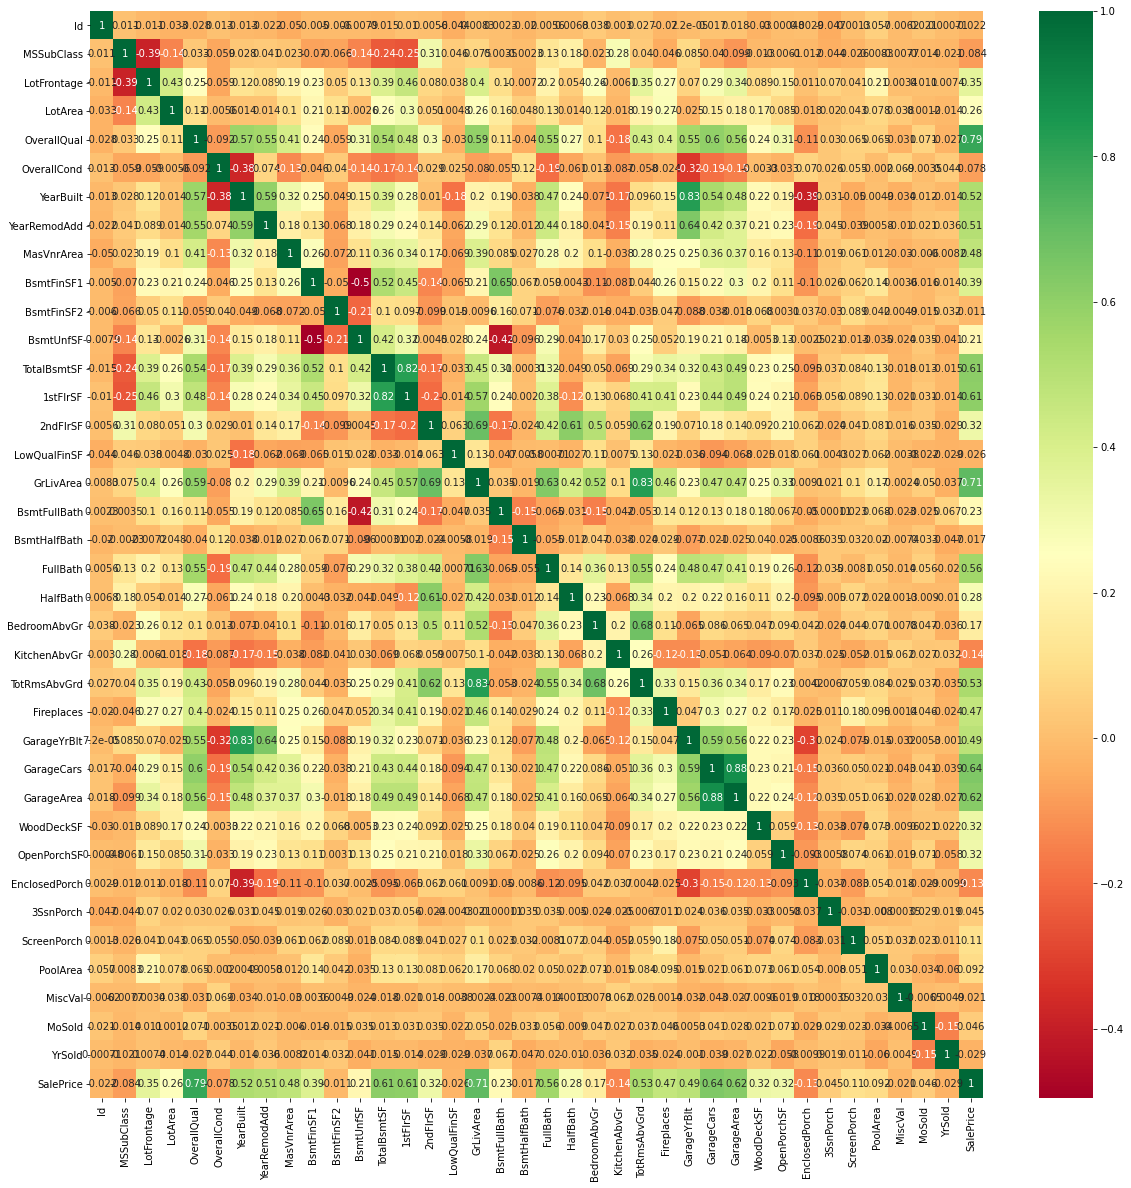

In [8]:
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

OverallQual, GrLivArea, GarageCars, GarageArea

# 0.4

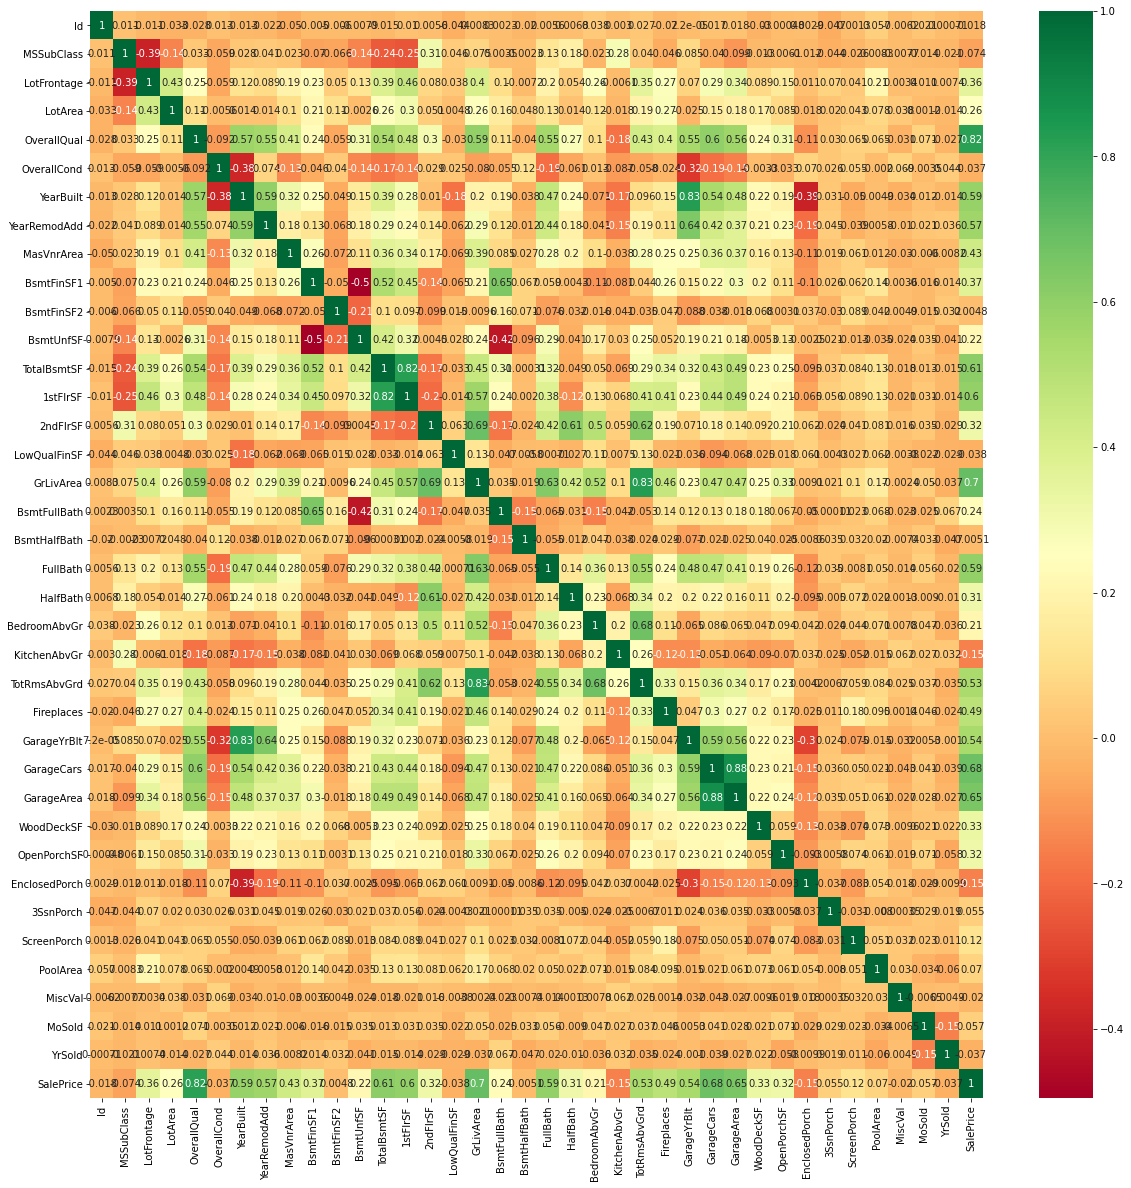

In [9]:
logarithm_base10 = train
logarithm_base10['SalePrice'] = np.log10(logarithm_base10['SalePrice']) 

#get correlations of each features in dataset
corrmat = logarithm_base10.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(logarithm_base10[top_corr_features].corr(),annot=True,cmap="RdYlGn")

After applying log10 on target feature scores seems to have been proved.

# 0.6

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


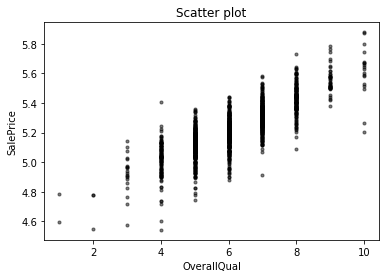

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


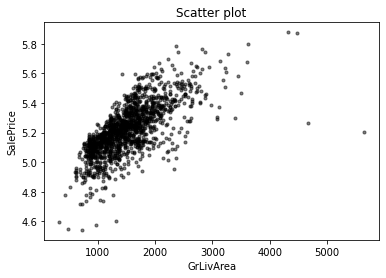

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


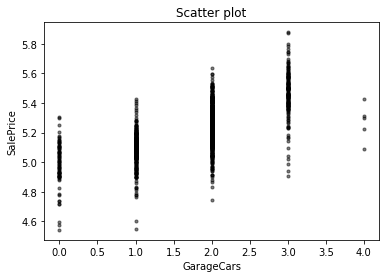

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


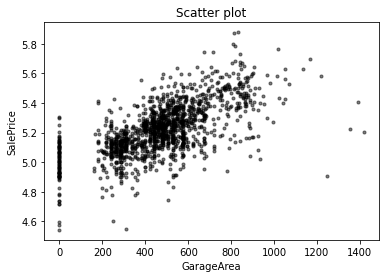

In [10]:
featuresToPlot = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']
y = train.SalePrice
colors = (0,0,0)
area = np.pi*3

for feature in featuresToPlot:
    X = train[feature]

    # Plot
    plt.scatter(X, y, s=area, c=colors, alpha=0.5)
    plt.title('Scatter plot')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

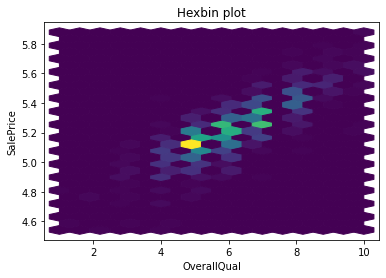

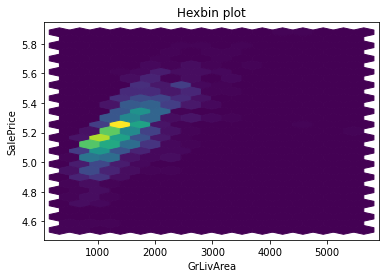

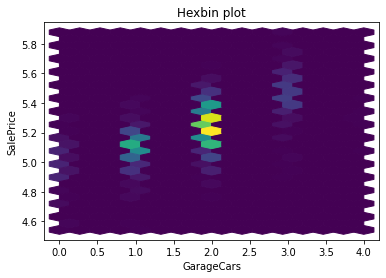

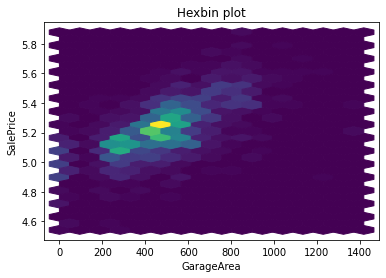

In [11]:
for feature in featuresToPlot:
    X = train[feature]

    # Plot
    plt.hexbin(X, y, gridsize=(15,15) )
    plt.title('Hexbin plot')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

# 1.1
## Deleting Rows with missing values
Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

### Pros:
* A model trained with the removal of all missing values creates a robust model.

### Cons:
* Loss of a lot of information.
* Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.


## Mean/Median/Mode Imputation
In this method, any missing values in a given column are replaced with the mean (or median, or mode) of that column. This is the easiest to implement and comprehend.


## Regression Imputation
This approach replaces missing values with a predicted value based on a regression line.
Regression is a statistical method which shows the relationship between a dependent variable and independent variables. It's expressed as y = mx + b where m is the slope, b is a constant, x is the independent variable and y is the dependent variable.





# 1.2
PoolQC : 99.52054794520548 %  
MiscFeature : 96.30136986301369 %  
Alley : 93.76712328767123 %  
Fence : 80.75342465753424 %  
FireplaceQu : 47.26027397260274 %  
LotFrontage : 17.73972602739726 %  
GarageType : 5.5479452054794525 %  
GarageYrBlt : 5.5479452054794525 %  
GarageFinish : 5.5479452054794525 %  
GarageQual : 5.5479452054794525 %  
GarageCond : 5.5479452054794525 %  
BsmtExposure : 2.6027397260273974 %  
BsmtFinType2 : 2.6027397260273974 %  
BsmtQual : 2.5342465753424657 %  
BsmtCond : 2.5342465753424657 %  
BsmtFinType1 : 2.5342465753424657 %  
MasVnrType : 0.547945205479452 %  
MasVnrArea : 0.547945205479452 %  
Electrical : 0.0684931506849315 %  

In [12]:
#Dropping columns with high null ratio
train = train.drop(columns = [train.columns[0], 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

#fillna numerical columns
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)

## Frequent Categorical Imputation
### Assumptions: Data is Missing At Random (MAR) and missing values look like the majority.  
### Description: Replacing NAN values with the most frequent occurred category in variable/column.

In [13]:
#fillna categorical columns
train['GarageType'].fillna(train['GarageType'].mode(), inplace = True)
train['GarageFinish'].fillna(train['GarageFinish'].mode(), inplace = True)
train['GarageQual'].fillna(train['GarageQual'].mode(), inplace = True)
train['GarageCond'].fillna(train['GarageCond'].mode(), inplace = True)
train['BsmtExposure'].fillna(train['BsmtExposure'].mode(), inplace = True)
train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode(), inplace = True)
train['BsmtQual'].fillna(train['BsmtQual'].mode(), inplace = True)
train['BsmtCond'].fillna(train['BsmtCond'].mode(), inplace = True)
train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode(), inplace = True)
train['MasVnrType'].fillna(train['MasVnrType'].mode(), inplace = True)
train['Electrical'].fillna(train['Electrical'].mode(), inplace = True)

# 1.3
Normalization typically means rescales the values into a range of [0,1]. Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

## Normalization
Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.


## Standardization
Assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

As mentioned upper *Normalization* and *Standardization* are useful when data has varying scales, so it'd be better if we apply *Normalization* on datas when using k-nearest neighbors regression method as the method is assuming the distribution of datas is not Gaussian, and on the other hand apply *Standardization* when using linear regression as the method is assuming the distribution of datas is Gaussian.

# 1.4

## Numeral 

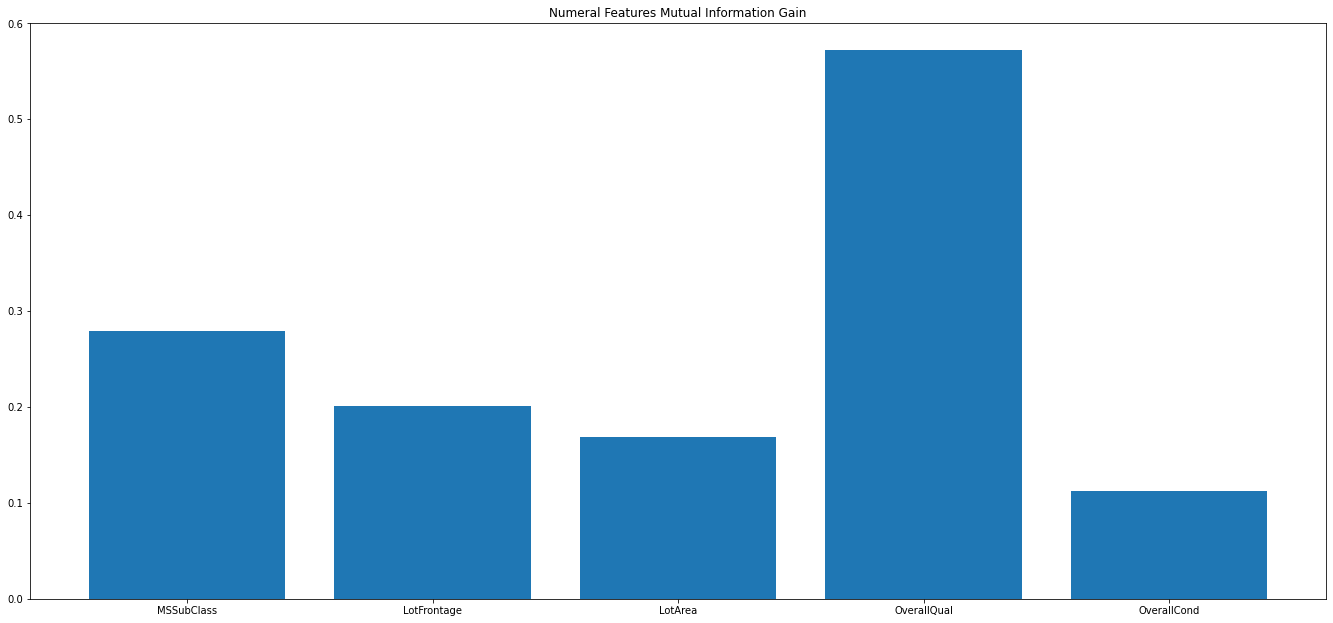

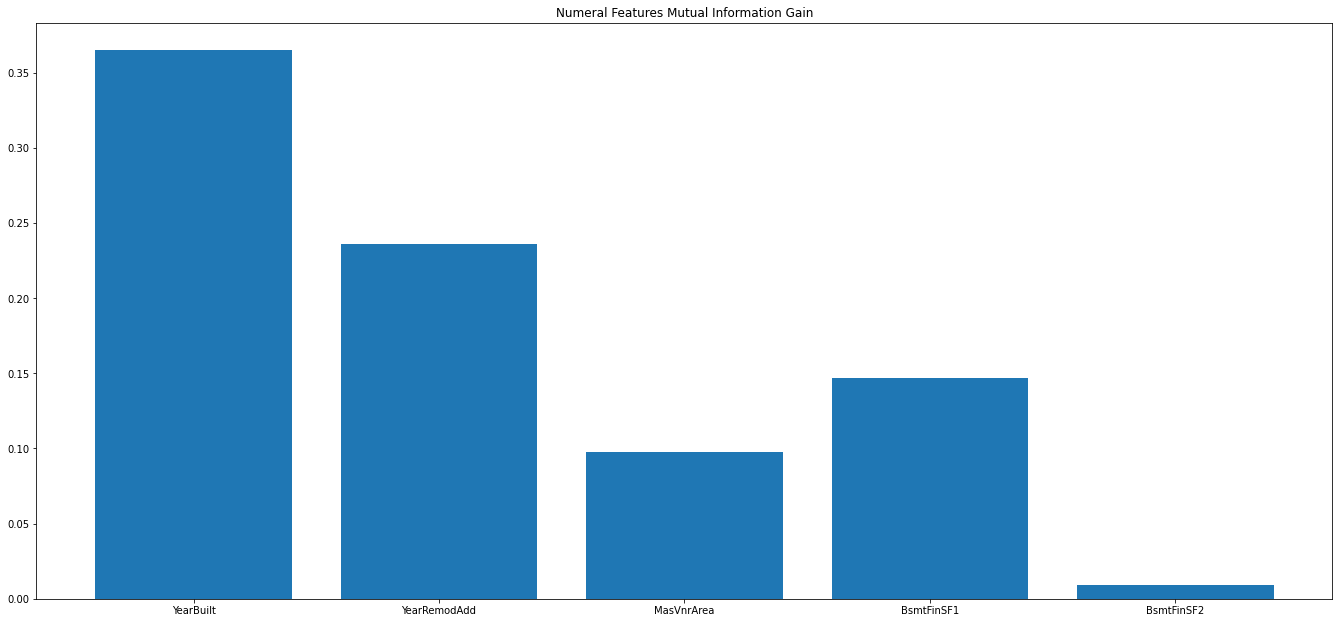

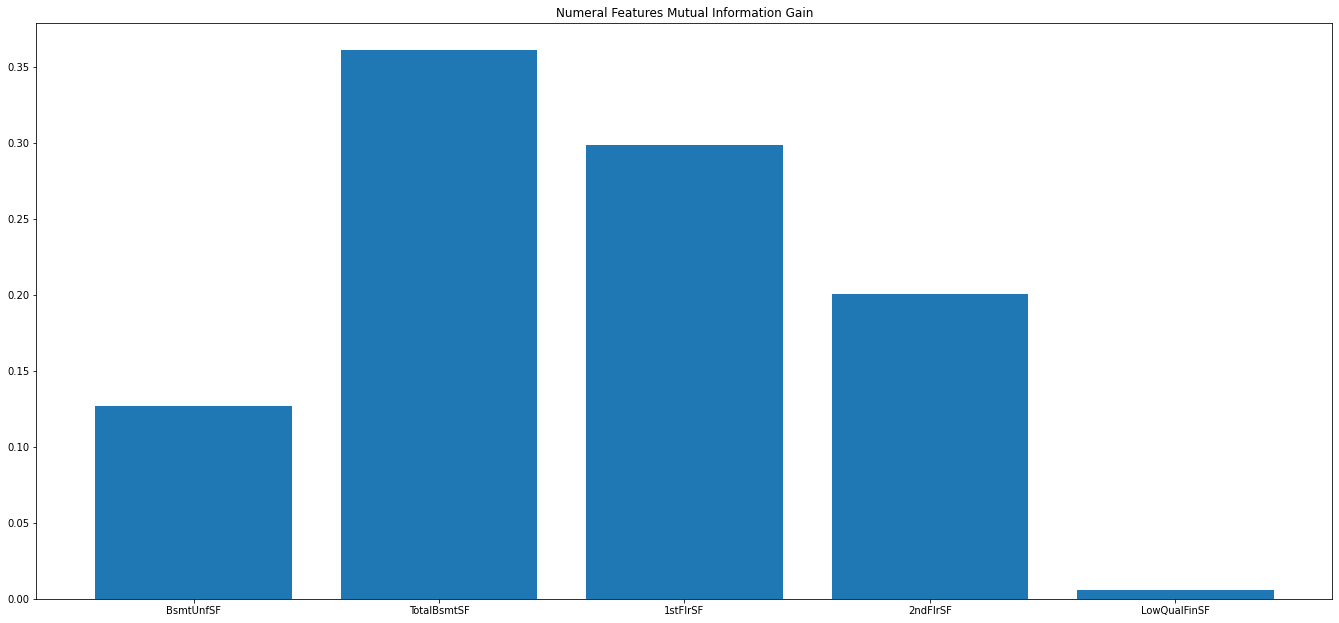

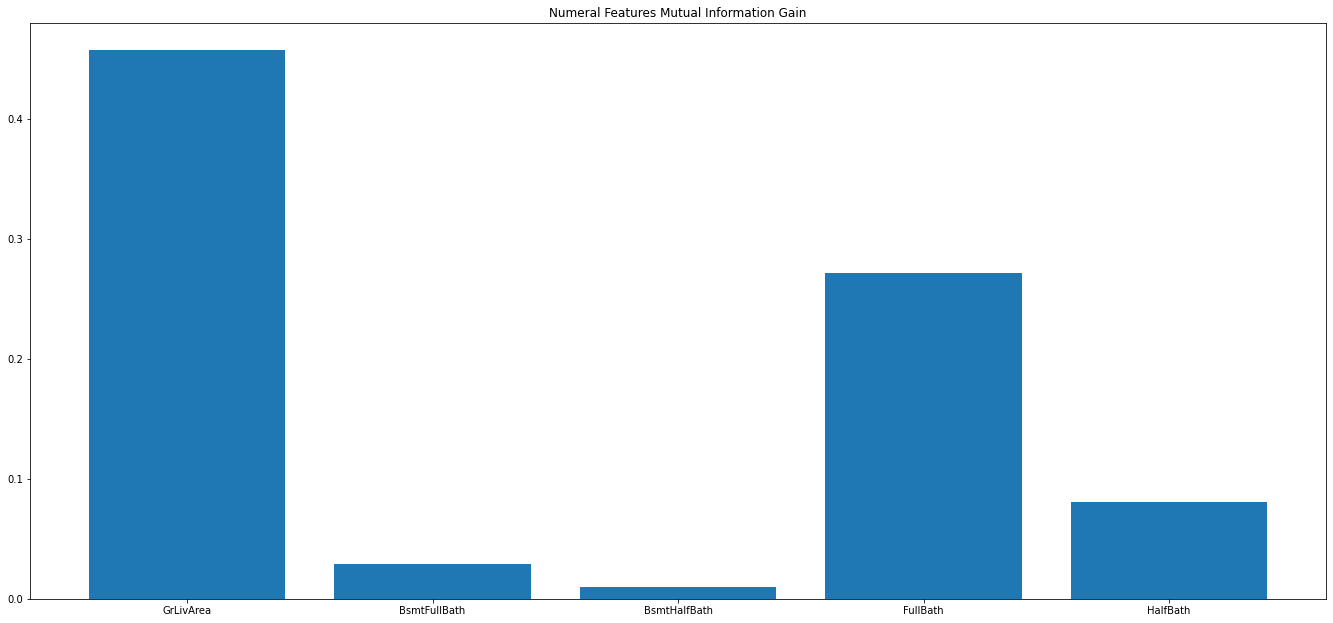

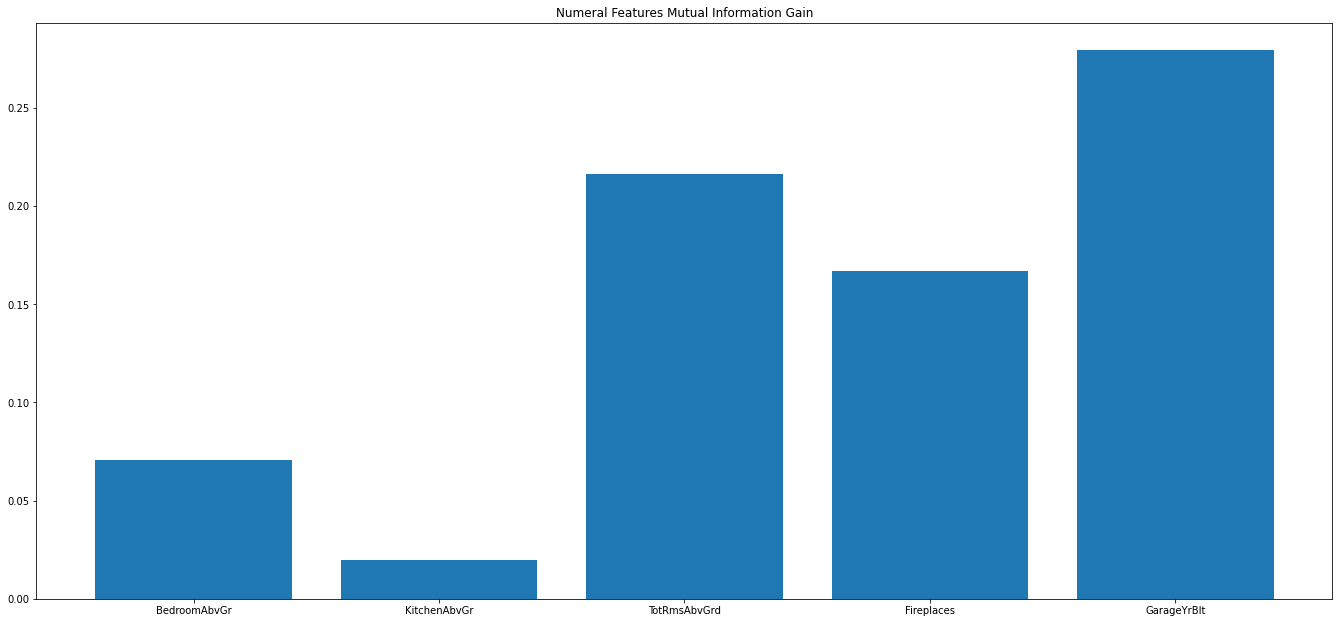

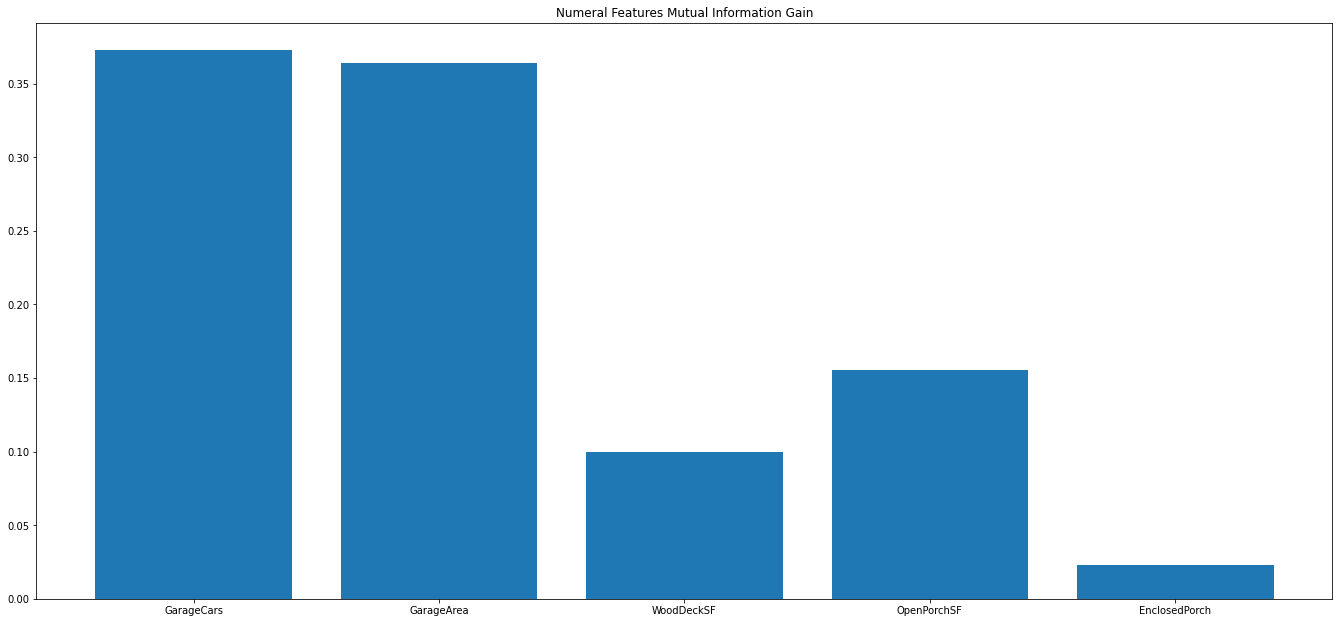

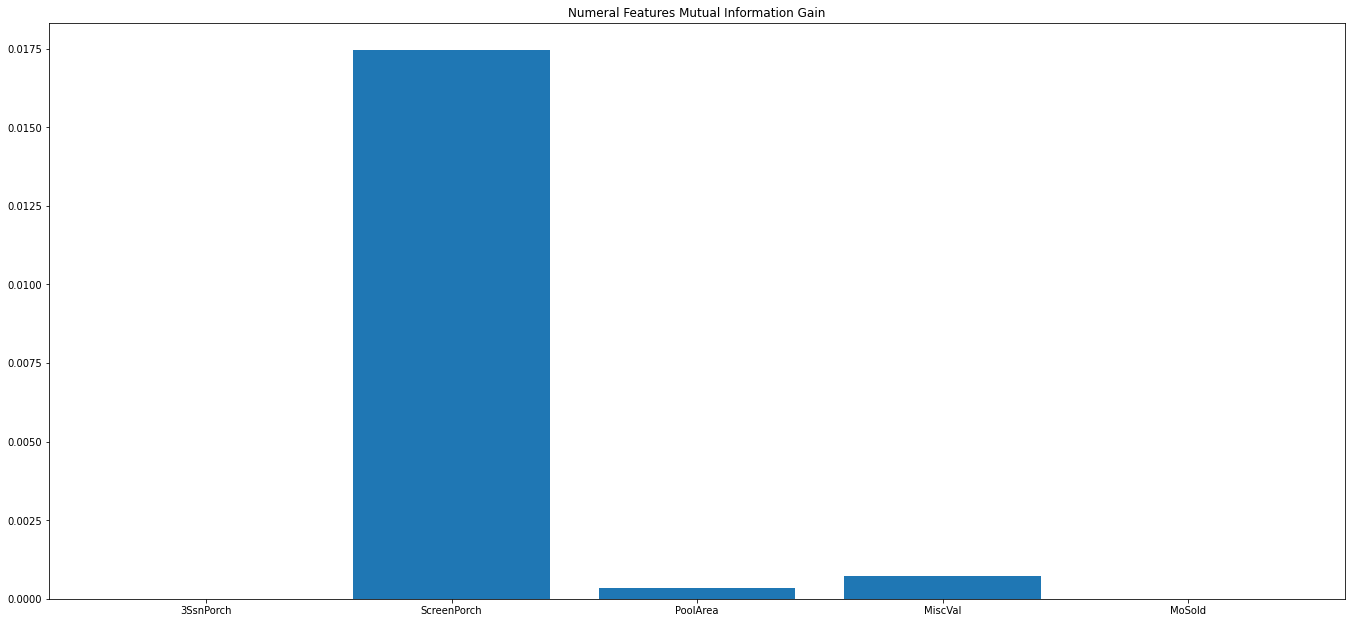

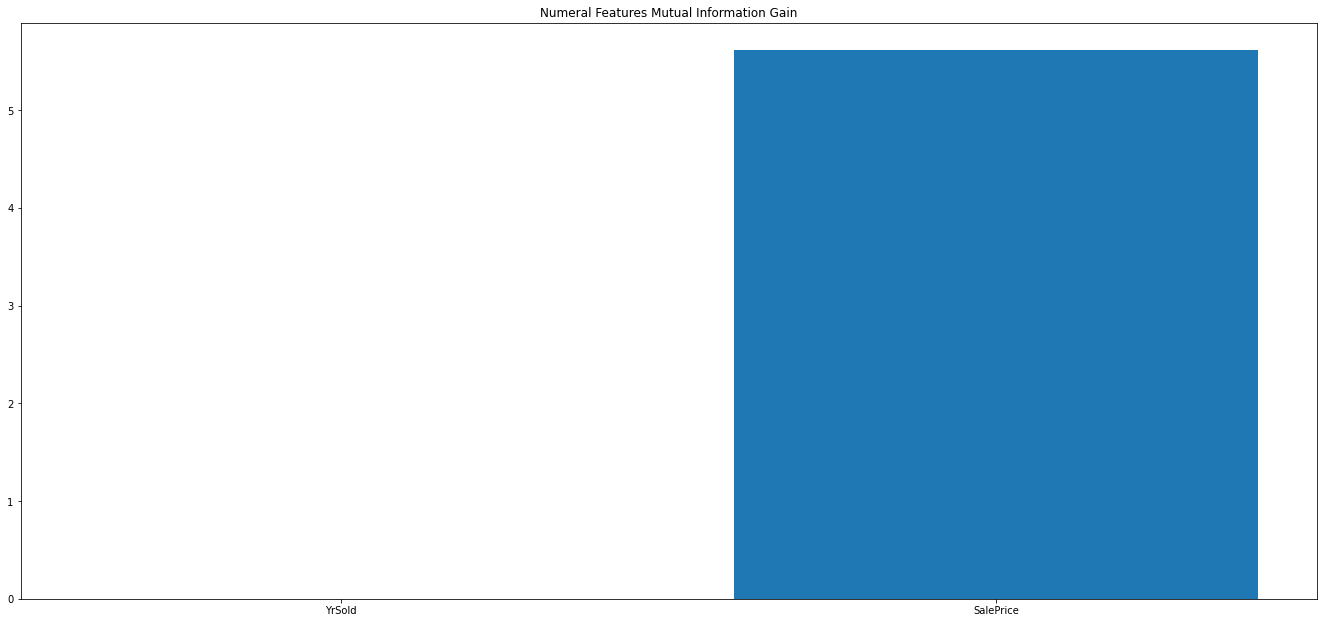

In [14]:
y = train['SalePrice']

numeralFeatures = []
for column in train:
    if train[column].dtype == object:
        continue
    numeralFeatures.append(column)

numeralFeaturesInformation_gain = mutual_info_regression(train[numeralFeatures], y, random_state = 10)

evenlySizedListsOfNumeralFeatures = [numeralFeatures[i * 5:(i + 1) * 5] for i in range((len(numeralFeatures) + 5 - 1) // 5 )]  
evenlySizedListsOfInformation_gain = [numeralFeaturesInformation_gain[i * 5:(i + 1) * 5] for i in range((len(numeralFeaturesInformation_gain) + 5 - 1) // 5 )]  

evenlySizedInformation_gain = iter(evenlySizedListsOfInformation_gain)
for evenlySizedNumeralFeatures in evenlySizedListsOfNumeralFeatures:
    fig = plt.figure()
    ax = fig.add_axes([0,0,3,2])

    ax.bar(
        evenlySizedNumeralFeatures,
        next(evenlySizedInformation_gain)
    )
    plt.title('Numeral Features Mutual Information Gain')
    plt.show()

In [15]:
binaryFeatures = ['Street', 'CentralAir']
nominalFeatures= [feature for feature in train.columns if  feature not in numeralFeatures and feature not in binaryFeatures]

In [16]:
featuresToIgonre = []

numeralFeature = iter(numeralFeatures)
for numeralFeatureInformation_gain in numeralFeaturesInformation_gain:
    if numeralFeatureInformation_gain < 0.1:
        featuresToIgonre.append(
            next(numeralFeature)
        )

numeralFeatures = [x for x in numeralFeatures if x not in featuresToIgonre]

## Binary Feature Encoding
Binary features are those with only two possible values.

In [17]:
train['Street'] = train['Street'].replace({'Grvl':1, 'Pave':0})
train['CentralAir'] = train['CentralAir'].replace({'Y':1, 'N':0})

## Ordinal Feature Encoding
Ordinal features are those with some order associated with them.

## Nominal Features
Nominal features are categorical features that have no numerical importance. Order does not matter.

In [18]:
#handling categorical norminal columns
OneHotEncodes = []
for nominalFeature in nominalFeatures:
    OneHotEncodes.append(
        pd.get_dummies(train[nominalFeature])
    )

# 0.8
## Mutual Information

In [19]:
information_gain = mutual_info_regression(train[binaryFeatures], y, random_state = 10)

OneHotEncodesInformation_gain = []
for OneHotEncode in OneHotEncodes:
    OneHotEncodesInformation_gain.append(mutual_info_regression(OneHotEncode, y, random_state = 10))

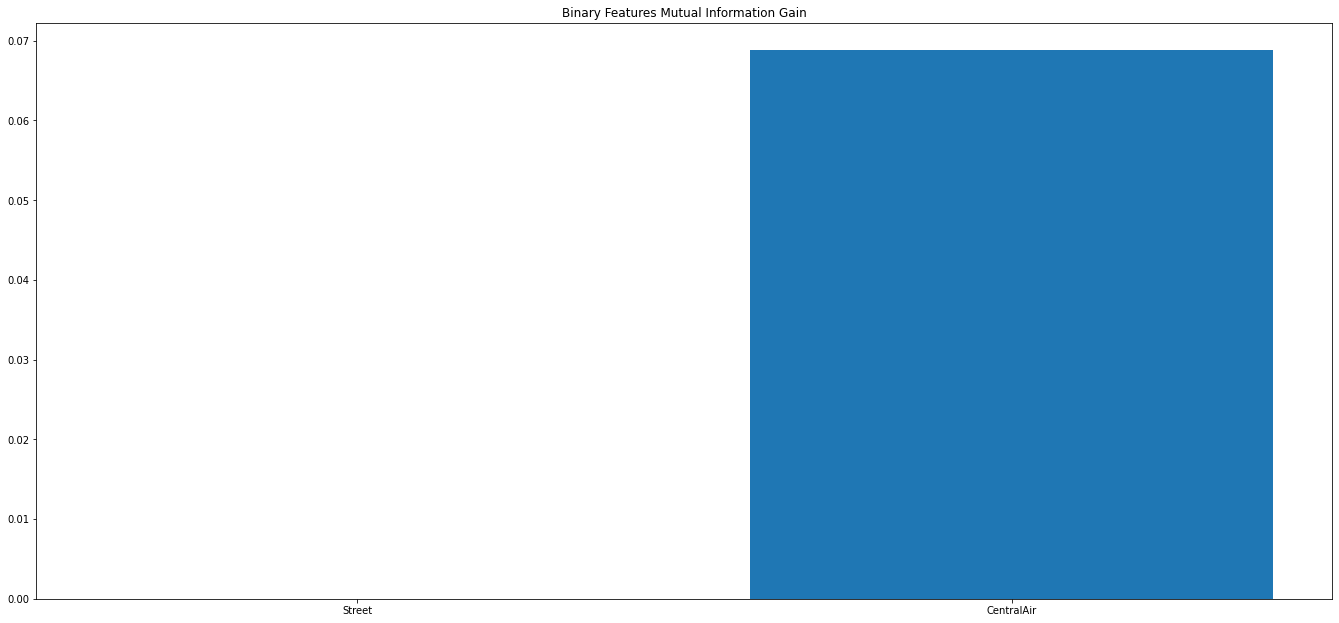

In [20]:

fig = plt.figure()
ax = fig.add_axes([0,0,3,2])

ax.bar(
    binaryFeatures,
    information_gain
)
plt.title('Binary Features Mutual Information Gain')
plt.show()

We are dropping both **Street** and **CentralAir** because of poor information gain.

In [21]:
train = train.drop(columns = ['Street', 'CentralAir'])

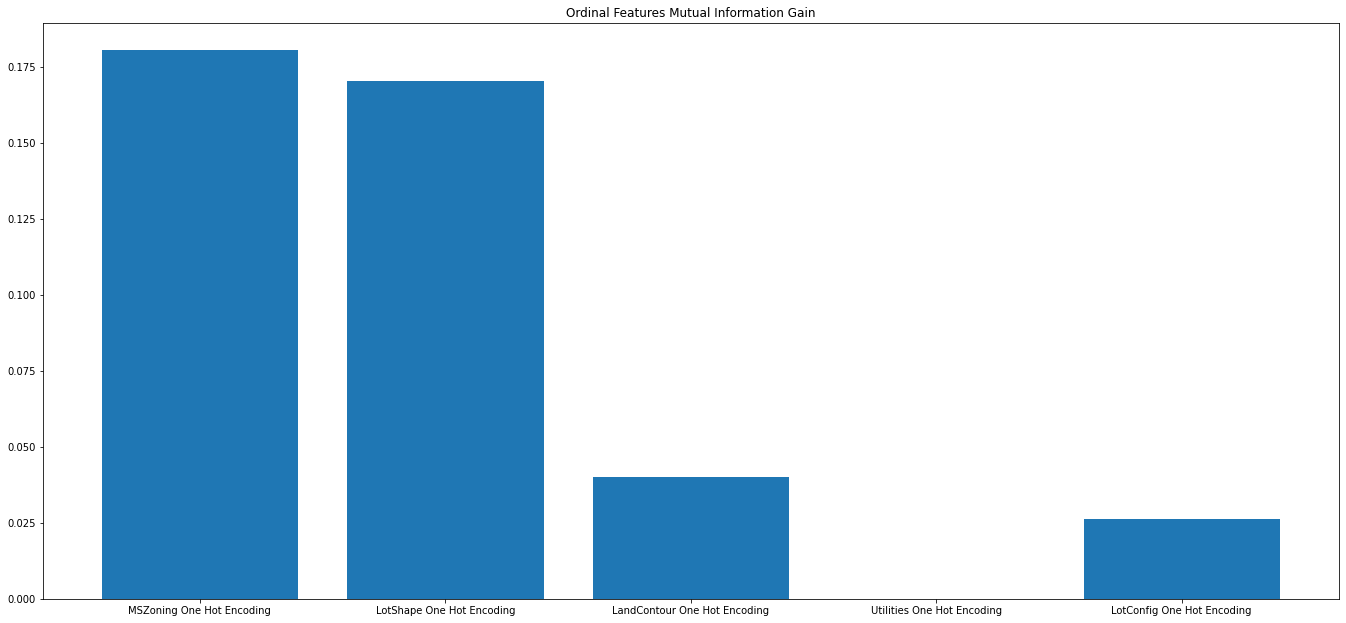

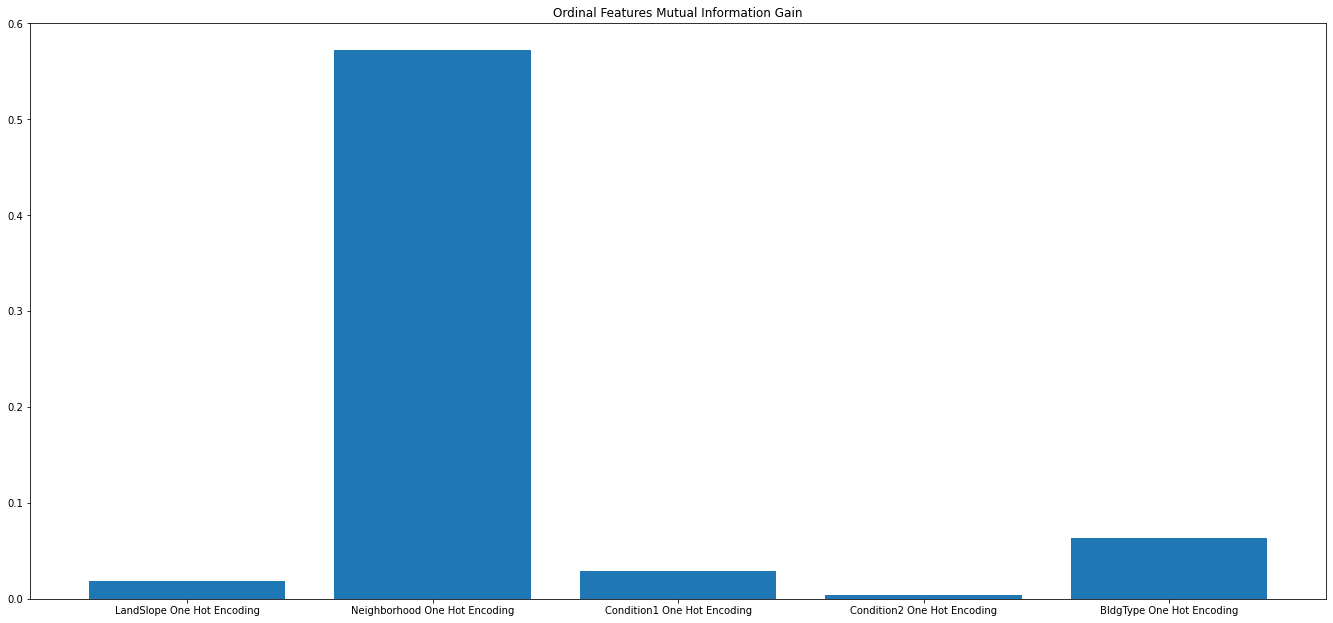

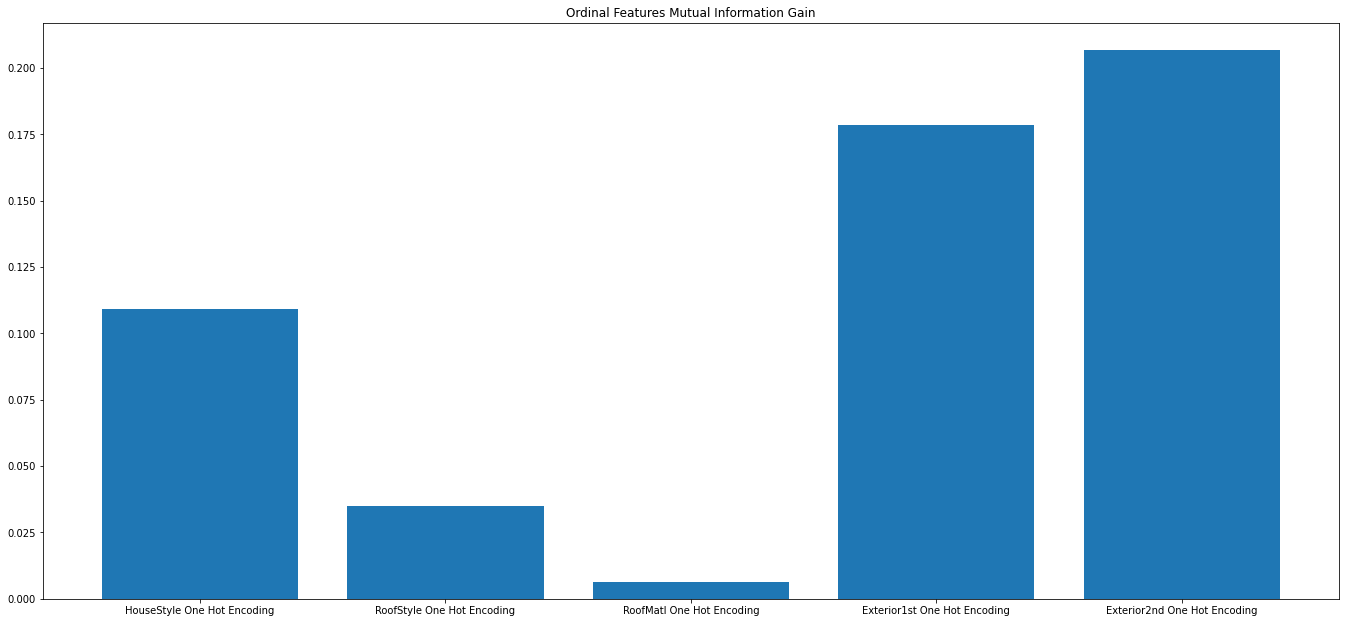

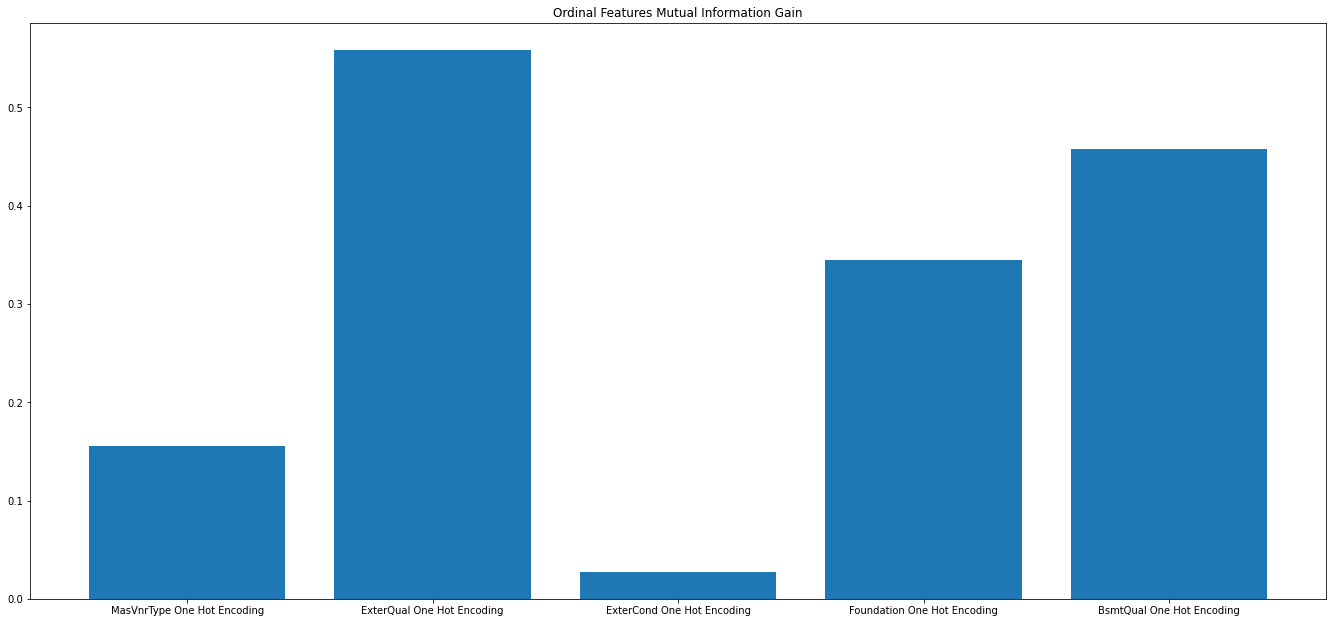

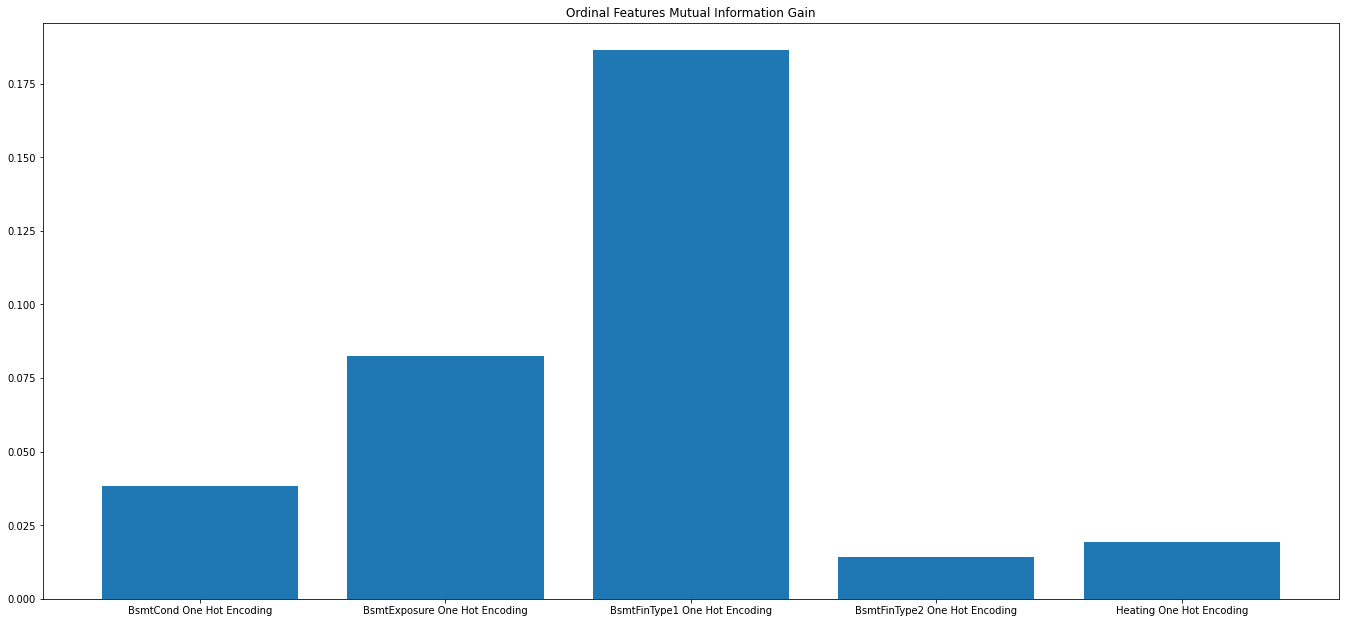

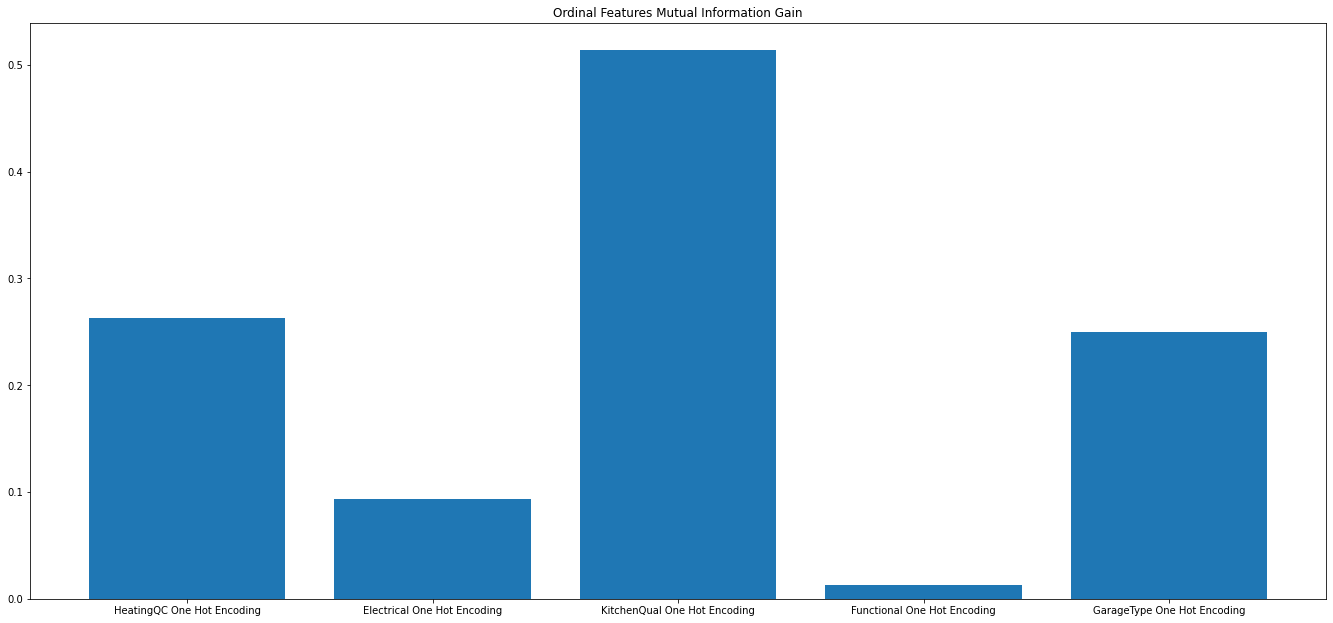

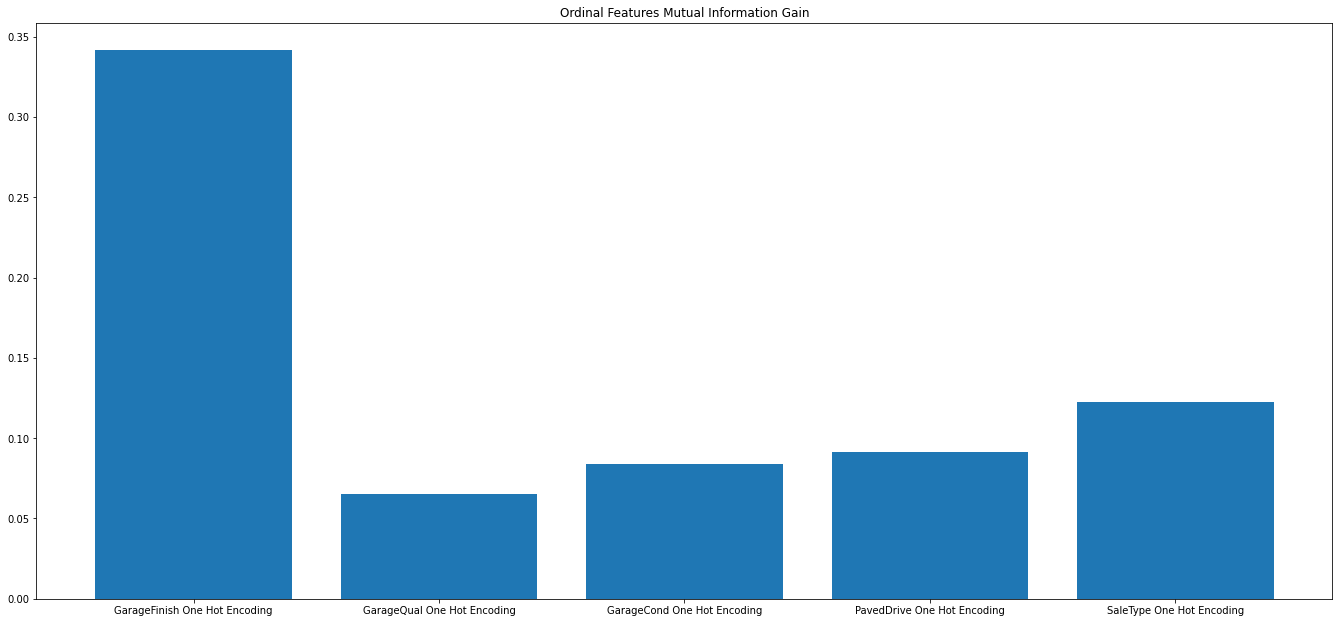

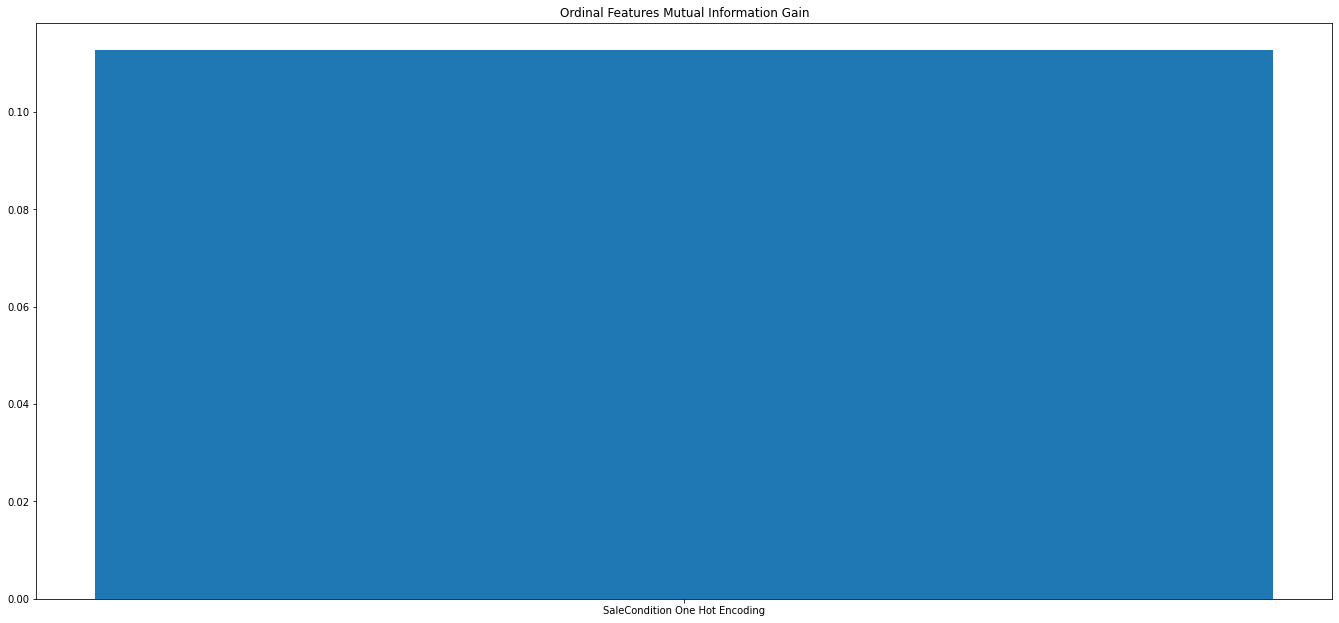

In [22]:
evenlySizedListsOfNorminalFeatures = [nominalFeatures[i * 5:(i + 1) * 5] for i in range((len(nominalFeatures) + 5 - 1) // 5 )]  
evenlySizedListsOfOneHotEncodesInformation_gain = [OneHotEncodesInformation_gain[i * 5:(i + 1) * 5] for i in range((len(OneHotEncodesInformation_gain) + 5 - 1) // 5 )]  

evenlySizedOneHotEncodesInformation_gain = iter(evenlySizedListsOfOneHotEncodesInformation_gain)
for evenlySizedNorminalFeatures in evenlySizedListsOfNorminalFeatures:
    fig = plt.figure()
    ax = fig.add_axes([0,0,3,2])

    ax.bar(
        [feature+' One Hot Encoding' for feature in evenlySizedNorminalFeatures],
        [sum(OneHotEncodeInformation_gain) for OneHotEncodeInformation_gain in next(evenlySizedOneHotEncodesInformation_gain)]
    )
    plt.title('Ordinal Features Mutual Information Gain')
    plt.show()

We are ignoring nominal features with information gain of **< 0.1**.

In [23]:
featuresToIgonre = []
for index, OneHotEncodeInformation_gain in enumerate(OneHotEncodesInformation_gain):
    if sum(OneHotEncodeInformation_gain) < 0.1:
        featuresToIgonre.append(
            nominalFeatures[index]
        )

nominalFeatures = [x for x in nominalFeatures if x not in featuresToIgonre]


# 1.6

In [24]:
OneHotEncodes =  pd.get_dummies(train[nominalFeature])

X = train[numeralFeatures]
X = X.join(OneHotEncodes)
y = train.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


## Evaluation Metrics
Here I use three metrics for evaluation `Mean Absolute Error`, `Mean Squared Error`, and `Root Mean Squared Error`. MSE in our problem is very big and can't give us much information. But about MAE and RMSE:

* **Mean Squared Error**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

<img src="Images/MAE.gif" width="250px" />

* **Root Mean Squared Error**: RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.
<img src="Images/RMSE.png"  width="250px"/>

They are almost the same but the difference between them is:

**Differences**: Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. The three tables below show examples where MAE is steady and RMSE increases as the variance associated with the frequency distribution of error magnitudes also increases.

In our problem, I think because we have very large numbers it is better to work with `MAE`.

In [25]:
def evaluation(y_train, train_predict, y_test, test_predict):

    table = pd.DataFrame([], index=['Mean Absolute Error','Mean Squared Error', 'Root Mean Squared Error'], columns=['Train Dataset', 'Test Dataset'])
    
    table.loc['Mean Absolute Error']['Train Dataset'] = metrics.mean_absolute_error(y_train, train_predict)
    table.loc['Mean Absolute Error']['Test Dataset'] = metrics.mean_absolute_error(y_test, test_predict)
    
    table.loc['Mean Squared Error']['Train Dataset'] = metrics.mean_squared_error(y_train, train_predict) 
    table.loc['Mean Squared Error']['Test Dataset'] = metrics.mean_squared_error(y_test, test_predict)
    
    table.loc['Root Mean Squared Error']['Train Dataset'] = np.sqrt(metrics.mean_squared_error(y_train, train_predict))
    table.loc['Root Mean Squared Error']['Test Dataset'] = np.sqrt(metrics.mean_squared_error(y_test, test_predict))
    
    return table

In [26]:
def show_test_result(y_test, test_predict):    
    test_df = pd.DataFrame({'Test Actual': y_test, 'Test Predicted': test_predict}).sample(n = 10)
    return test_df

## K Nearest Neighbors Regression
Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors. Here we try to tune the `n_neighbors` parameter to find best number of neighbors in our model.

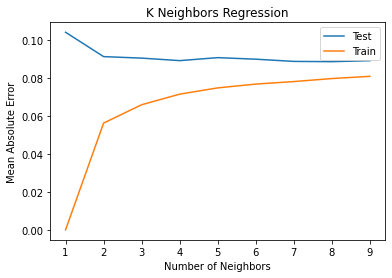

In [27]:
def KneighborsRegressionTuning():
    trainMAE, testMAE= [], []
    bestIndex = 0
    minMAE = float('inf')
    for i in list(range(1,10)):
        KNN = KNeighborsRegressor(n_neighbors=i)
        KNN = KNN.fit(X_train, y_train)
        test_predict = KNN.predict(X_test)
        train_predict = KNN.predict(X_train)
        testMAE.append(metrics.mean_absolute_error(y_test, test_predict))
        if metrics.mean_absolute_error(y_test, test_predict) < minMAE:
            minMAE = metrics.mean_absolute_error(y_test, test_predict)
            bestIndex = i
        trainMAE.append(metrics.mean_absolute_error(y_train, train_predict))

    plt.plot(list(range(1, 10)), testMAE, label='Test')
    plt.plot(list(range(1, 10)), trainMAE, label='Train')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Number of Neighbors')
    plt.title('K Neighbors Regression')
    plt.legend()
    plt.show()
    
KneighborsRegressionTuning()

In [28]:
def KneighborsRegressionMethod(bestNumofNeighbor):
    
    KNN = KNeighborsRegressor(n_neighbors = bestNumofNeighbor)
    KNN = KNN.fit(X_train, y_train)
    test_predict = KNN.predict(X_test)
    train_predict = KNN.predict(X_train)
   
    return test_predict, train_predict

bestNumofNeighbor = 10
test_predict, train_predict = KneighborsRegressionMethod(bestNumofNeighbor)
result = evaluation(y_train, train_predict, y_test, test_predict)
result

Train Dataset Test Dataset
Mean Absolute Error         0.0816252    0.0892137
Mean Squared Error           0.011987    0.0150088
Root Mean Squared Error      0.109485      0.12251

## Decision Tree Regression
Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Here, I try to tune `max_depth` parameter to find best depth that our model can train. As we can see from result after fifth depth, data get overfitted. So, I use `5` as best depth for our model.

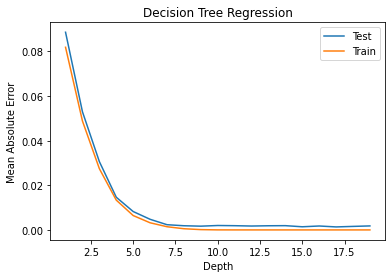

In [29]:
def DecisionTreeRegressionTuning():
    
    trainMAE, testMAE= [], []
    bestIndex = 0
    minMAE = float('inf')
    for i in list(range(1,20)):
        reg = tree.DecisionTreeRegressor(max_depth=i)
        reg = reg.fit(X_train, y_train)
        test_predict = reg.predict(X_test)
        train_predict = reg.predict(X_train)
        testMAE.append(metrics.mean_absolute_error(y_test, test_predict))
        if metrics.mean_absolute_error(y_test, test_predict) < minMAE:
            minMAE = metrics.mean_absolute_error(y_test, test_predict)
            bestIndex = i
        trainMAE.append(metrics.mean_absolute_error(y_train, train_predict))

    plt.plot(list(range(1, 20)), testMAE, label='Test')
    plt.plot(list(range(1, 20)), trainMAE, label='Train')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Depth')
    plt.title('Decision Tree Regression')
    plt.legend()
    plt.show()

DecisionTreeRegressionTuning()

In [30]:
def DecisionTreeRegressionMethod(best_depth):
    reg = tree.DecisionTreeRegressor(max_depth = best_depth)
    reg = reg.fit(X_train, y_train)
    test_predict = reg.predict(X_test)
    train_predict = reg.predict(X_train)
    
    return test_predict, train_predict

best_depth = 5
test_predict, train_predict = DecisionTreeRegressionMethod(best_depth)
result = evaluation(y_train, train_predict, y_test, test_predict)
result

Train Dataset Test Dataset
Mean Absolute Error        0.00644076   0.00823493
Mean Squared Error        6.81569e-05  0.000121559
Root Mean Squared Error    0.00825572    0.0110254

## Linear Regression
The most simple way of traning a regression model is using the `Linear Regression` algorrithm. This Algorithm hasn't any specific parameter to tune. LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:
<img src="Images/Linear.png" width="250"/>

The result is not very bad, but we should use more complex models because our model isn't linear.

In [31]:
def LinearRegressionMethod(X_train, X_test, y_train, y_test):
    
    linear_regression = LinearRegression()
    linear_regression = linear_regression.fit(X_train, y_train)
    test_predict = linear_regression.predict(X_test)
    train_predict = linear_regression.predict(X_train)
   
    return test_predict, train_predict
    
test_predict, train_predict = LinearRegressionMethod(X_train, X_test, y_train, y_test)
result = evaluation(y_train, train_predict, y_test, test_predict)
result

Train Dataset Test Dataset
Mean Absolute Error       1.19539e-15  1.18322e-15
Mean Squared Error        2.14235e-30   2.0559e-30
Root Mean Squared Error   1.46368e-15  1.43384e-15

In [32]:
result = show_test_result(y_test, test_predict)
result

Test Actual  Test Predicted
1029     5.071882        5.071882
140      5.060698        5.060698
1378     4.919078        4.919078
418      5.100371        5.100371
599      5.178977        5.178977
772      5.029384        5.029384
961      5.434569        5.434569
785      5.208173        5.208173
736      4.970812        4.970812
435      5.326336        5.326336

## Random Forest Regression
In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size `max_features`.  Here, I try to tune `max_depth` parameter to find best depth that our model can train. As we can see from result as depth go further, we have better result. So, I use `4` as best depth for our model.

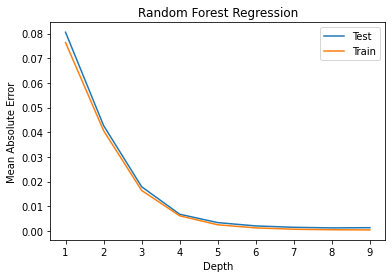

In [33]:
def RandomForestRegressionTuning():
    
    trainMAE, testMAE= [], []
    bestIndex = 0
    minMAE = float('inf')
    for i in list(range(1,10)):
        RFreg = RandomForestRegressor(max_depth=i)
        RFreg = RFreg.fit(X_train, y_train)
        test_predict = RFreg.predict(X_test)
        train_predict = RFreg.predict(X_train)
        testMAE.append(metrics.mean_absolute_error(y_test, test_predict))
        if metrics.mean_absolute_error(y_test, test_predict) < minMAE:
            minMAE = metrics.mean_absolute_error(y_test, test_predict)
            bestIndex = i
        trainMAE.append(metrics.mean_absolute_error(y_train, train_predict))

    plt.plot(list(range(1, 10)), testMAE, label='Test')
    plt.plot(list(range(1, 10)), trainMAE, label='Train')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Depth')
    plt.title('Random Forest Regression')
    plt.legend()
    plt.show()
    
RandomForestRegressionTuning()

In [34]:
def RandomForestRegressionMethod(best_depth):
    reg = RandomForestRegressor(max_depth = best_depth)
    reg = reg.fit(X_train, y_train)
    test_predict = reg.predict(X_test)
    train_predict = reg.predict(X_train)
    
    return test_predict, train_predict, reg

best_depth = 4
test_predict, train_predict, reg = RandomForestRegressionMethod(best_depth)
result = evaluation(y_train, train_predict, y_test, test_predict)
result

Train Dataset Test Dataset
Mean Absolute Error        0.00588681   0.00646662
Mean Squared Error        8.64314e-05  0.000127445
Root Mean Squared Error    0.00929685    0.0112892

In [35]:
import operator

def VotingRegression():
    bestNumofNeighbor = 10
    best_depth = 10

    test_predict, train_predict = KneighborsRegressionMethod(bestNumofNeighbor)
    test_predict, train_predict = tuple(map(operator.add, (test_predict, train_predict), DecisionTreeRegressionMethod(best_depth)))
    test_predict, train_predict = tuple(map(operator.add, (test_predict, train_predict), LinearRegressionMethod(X_train, X_test, y_train, y_test)))

    return test_predict, train_predict

test_predict, train_predict = VotingRegression()
result = evaluation(y_train, train_predict/3, y_test, test_predict/3)
result

Train Dataset Test Dataset
Mean Absolute Error          0.027209    0.0296378
Mean Squared Error         0.00133191   0.00166464
Root Mean Squared Error     0.0364953       0.0408

In [36]:
result = show_test_result(y_test, test_predict)
result

Test Actual  Test Predicted
1448     5.049218       15.247284
1069     5.130334       15.443018
1246     5.270679       15.871849
857      5.240549       15.614387
736      4.970812       15.029480
283      5.388456       16.301044
1338     5.301030       15.887412
587      5.136721       15.442840
223      4.986772       15.169027
759      5.462398       16.426164